## Remove dodgy images

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\luisP\AppData\Local\Temp\ipykernel_26380\3676753470.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data'

In [3]:
image_ext = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext:
                print(f'Image not in ext list {image_path}')
                #os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')


## Load Data

In [5]:
import numpy as np

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 205 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x00000120CFCF7830>)

In [8]:
# Get another bacth from the iterator
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

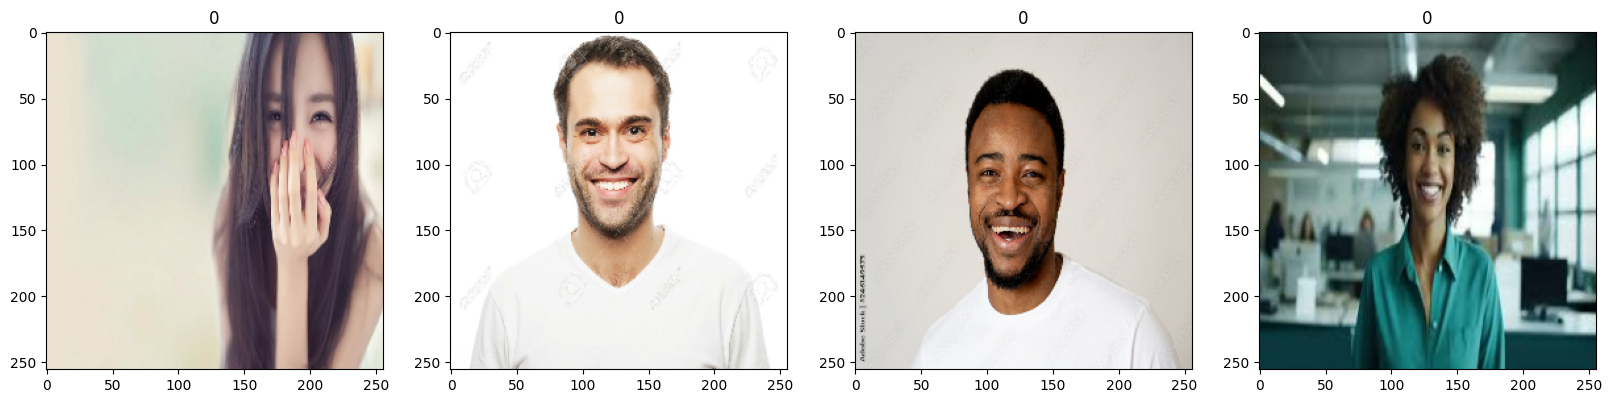

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

## Scale Data

In [10]:
data = data.map(lambda x,y: (x/255, y))

## Split Data

In [11]:
len(data)

7

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

## Build Deep Learning Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input

In [15]:
model = Sequential()

In [16]:
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [19]:
logdir = 'logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 468ms/step - accuracy: 0.6229 - loss: 0.9230 - val_accuracy: 0.4844 - val_loss: 0.6956
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 0.5458 - loss: 0.6727 - val_accuracy: 0.5000 - val_loss: 0.7235
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.6448 - loss: 0.6148 - val_accuracy: 0.7344 - val_loss: 0.5857
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.6938 - loss: 0.6205 - val_accuracy: 0.8281 - val_loss: 0.5228
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 535ms/step - accuracy: 0.6802 - loss: 0.5504 - val_accuracy: 0.6250 - val_loss: 0.6153
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.7021 - loss: 0.5580 - val_accuracy: 0.7031 - val_loss: 0.5461
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - accuracy: 0.7812 - loss: 0.4756 - val_accuracy: 0.8281 - val_loss: 0.3695
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 555ms/step - accuracy: 0.7833 - loss: 0.3971 - val_accuracy: 0.7812 - val_loss:

## Plot Performance

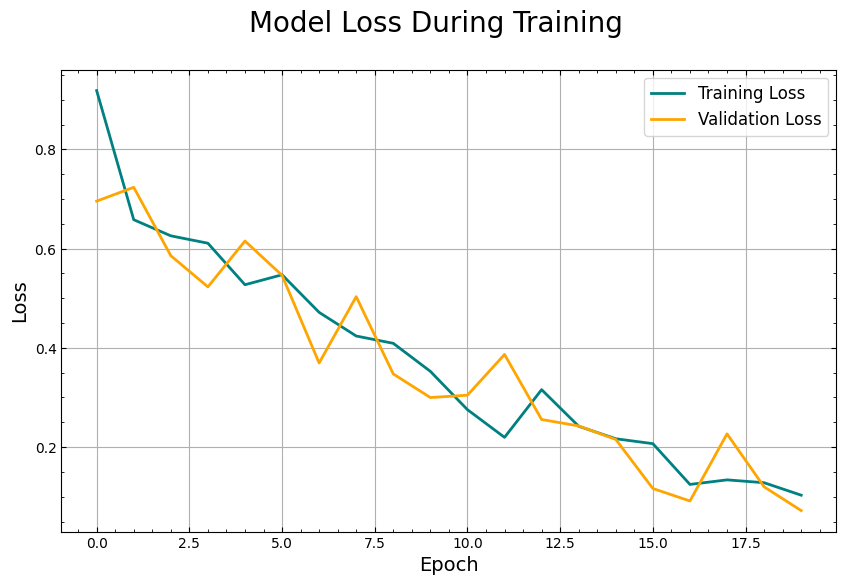

In [35]:
# Create the figure and the line plots
fig = plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], color='teal', label='Training Loss', linewidth=2)
plt.plot(hist.history['val_loss'], color='orange', label='Validation Loss', linewidth=2)

# Add title and labels with increased fontsize for better readability
fig.suptitle('Model Loss During Training', fontsize=20)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add a grid for better readability of the graph
plt.grid(True)

# Add a legend
plt.legend(loc='upper right', fontsize=12)

# Add minor ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Show the plot
plt.show()

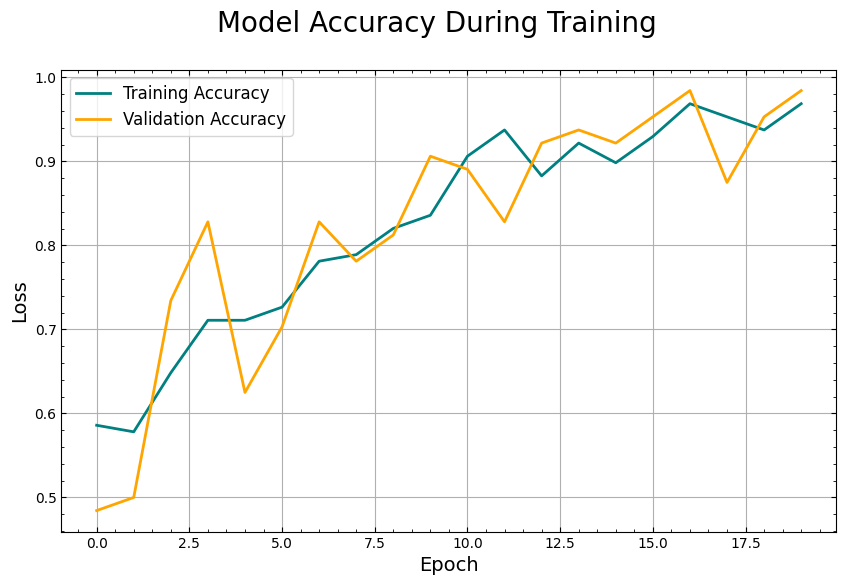

In [36]:
import matplotlib.pyplot as plt

# Create the figure and the line plots
fig = plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], color='teal', label='Training Accuracy', linewidth=2)
plt.plot(hist.history['val_accuracy'], color='orange', label='Validation Accuracy', linewidth=2)

# Add title and labels with increased fontsize for better readability
fig.suptitle('Model Accuracy During Training', fontsize=20)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add a grid for better readability of the graph
plt.grid(True)

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add minor ticks
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)

# Show the plot
plt.show()

# Evaluate Performance

## Evaluate

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [27]:
print(f'Precision:{pre.result()}, Recall:{re.result()}, Accuracy:{acc.result()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## Test

### Happy Test

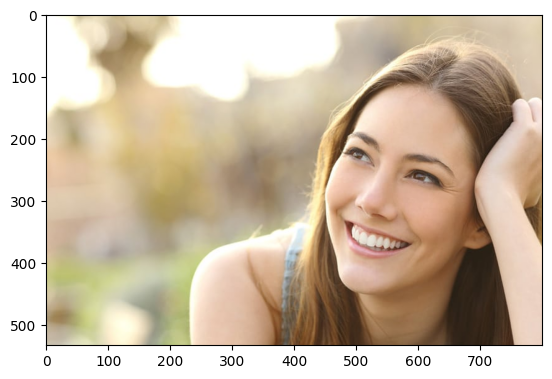

In [28]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

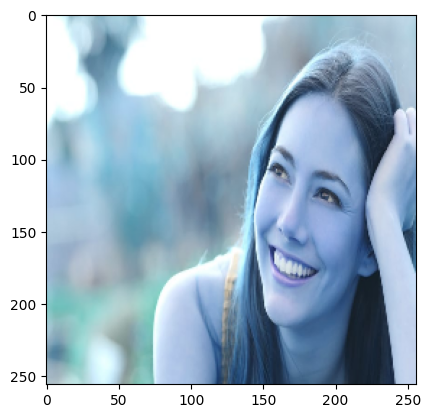

In [29]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
image_test = np.expand_dims(resize/255,0)

yhat = model.predict(image_test)

if yhat > 0.5:
    print('This is a sad person! :(')
else:
    print('This is a happy person! :D')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
This is a happy person! :D


### Sad Test

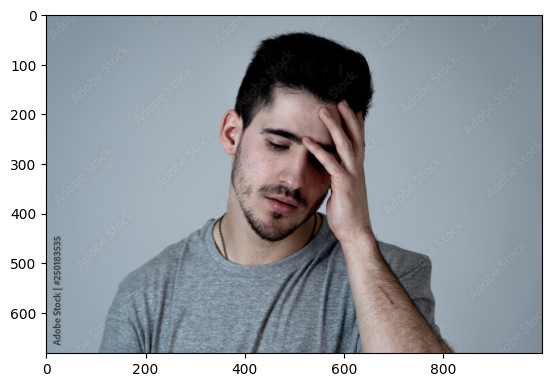

In [31]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

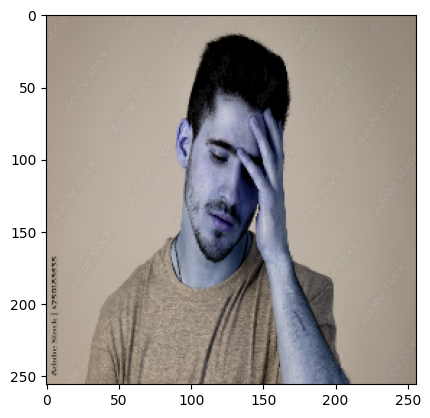

In [32]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
image_test = np.expand_dims(resize/255,0)

yhat = model.predict(image_test)

if yhat > 0.5:
    print('This is a sad person! :(')
else:
    print('This is a happy person! :D')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This is a sad person! :(


# Save the model

In [34]:
model.save(os.path.join('happysadmodel.h5'))